# **Stable Diffusion**

In [23]:
!pip install --upgrade diffusers[torch]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [24]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_image(prompt):
    image = pipe(prompt).images[0]
    return image

Loading pipeline components...: 100%|██████████| 7/7 [00:12<00:00,  1.82s/it]


In [25]:
import base64
from io import BytesIO
from PIL import Image

def convert_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    # img_base64 = bytes("data:image/jpeg;base64,", encoding='utf-8') + img_str
    # img_base64 = img_base64.decode("utf-8")
    img_base64 = img_str.decode("utf-8")
    return img_base64

def convert_base64_to_image(img_base64):
    img_bytes = base64.b64decode(img_base64)
    img = Image.open(BytesIO(img_bytes))
    return img

In [26]:
prompt = "a photo of a cat"
image = generate_image(prompt)
image_base64 = convert_image_to_base64(image)
image_base64

100%|██████████| 50/50 [00:08<00:00,  5.97it/s]


'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIAAgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCUU4CkxTwKADFNQ5JHcHBqXHtUEh8qUPj5Tw3tQBMBTgKTPA9DTgRQAuDS0HkcdKARQA4cilxTCcdfzpwfj+lADsUEcc03ePoaN/OP0NAC9OtLioy/O3PJ7U6Fw2UONwoAdil5oYgHBIGelMZjHyRkUAPpwFMjkR8YI56VKBQ

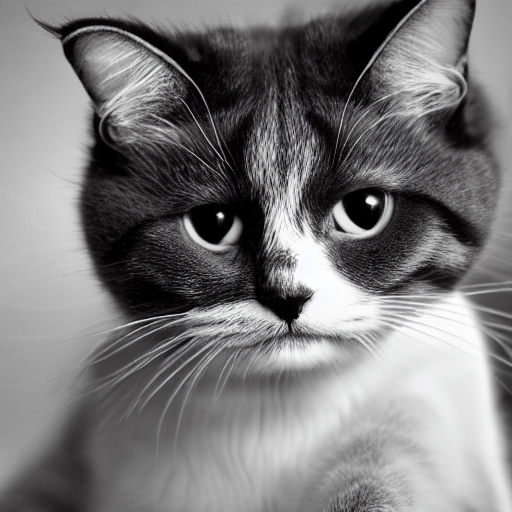

In [27]:
image


# **Transformer**

In [28]:
!pip install tf-keras

^C


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [7]:
from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

def generate_caption(image):
    captions = captioner(image)
    generated_caption = captions[0]['generated_text']
    return generated_caption

c:\Users\Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [8]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [9]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def get_similarity_score(prompt, generated_caption):
    embeddings1 = model.encode(prompt, convert_to_tensor=True)
    embeddings2 = model.encode(generated_caption, convert_to_tensor=True)

    similarity = util.pytorch_cos_sim(embeddings1, embeddings2).item()
    return similarity

**CNNIQA MOdel Set Up**

In [10]:
# !git clone https://github.com/lidq92/CNNIQA.git

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# %cd CNNIQA
# !pip install pytorch-ignite

In [13]:
# !python3 main.py

**The CNNIQA TEST Function**


In [14]:
# import torch
# import torchvision.transforms as transforms
# from PIL import Image
# def evaluate_single_image(model, image_path, device):
#     """
#     Evaluate the model on a single image and return the predicted quality score.

#     Parameters:
#     - model: The trained CNNIQA model.
#     - image_path: Path to the input image.
#     - device: The device to run the evaluation on (CPU or GPU).

#     Returns:
#     - predicted_quality: The predicted quality score for the input image.
#     """
#     # Preprocess the image
#     image = Image.open(image_path).convert('RGB')
#     # preprocess = transforms.Compose([
#         transforms.Resize((256, 256)),  # Resize to the input size of the model
#         transforms.ToTensor(),  # Convert to tensor
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
#     ])
#     image_tensor = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

#     # Evaluate the model
#     with torch.no_grad():
#         output = model(image_tensor)
#         predicted_quality = torch.mean(output).item()

#     return predicted_quality

# # Example usage
# if __name__ == "__main__":
#     # Assume `model` is the trained CNNIQA model
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.load_state_dict(torch.load(trained_model_file, map_location=device))  # Load the best model

#     # Evaluate on a single image
#     image_path = '/home/admincit/Desktop/iqa_gui_prototype/databaserelease2/Dataset/Test/Real/20.jpg'
#     predicted_quality = evaluate_single_image(model, image_path, device)
#     print(f'Predicted Quality Score: {predicted_quality}')

In [15]:
import threading

def run_with_tmole(app):
    def run_flask(app):
        app.run()
    t = threading.Thread(target=run_flask, args=(app,))
    t.start()
    !tmole 5000
    t.join()

In [37]:
# from flask import Flask, request
# import threading

# app = Flask(__name__)

# @app.route('/generate_image')
# def generate_image_endpoint():
#     prompt = request.args.get('prompt')
#     image = generate_image(prompt)
#     image_base64 = convert_image_to_base64(image)
#     generated_caption = generate_caption(image_base64)
#     similarity_score = get_similarity_score(prompt, generated_caption)
#     return {
#         'image_base64': image_base64,
#         'generated_caption': generated_caption,
#         'similarity_score': similarity_score
#     }

# if __name__ == '__main__':
#     # run_with_tmole(app)
#     app.run()
from flask import Flask, request, jsonify, abort
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import base64
from io import BytesIO
from sentence_transformers import SentenceTransformer, util
from diffusers import StableDiffusionPipeline
import numpy as np
import os

app = Flask(__name__)

sentence_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe.to("cuda" if torch.cuda.is_available() else "cpu")

def convert_image_to_base64(image: Image.Image) -> str:
    buffer = BytesIO()
    image.save(buffer, format="JPEG")
    return base64.b64encode(buffer.getvalue()).decode()

def generate_image(prompt: str) -> Image.Image:
    image = pipe(prompt).images[0]
    return image

def generate_caption(image_base64: str) -> str:
    return "Generated Caption"

def get_similarity_score(prompt: str, generated_caption: str) -> float:
    embeddings1 = sentence_model.encode(prompt, convert_to_tensor=True)
    embeddings2 = sentence_model.encode(generated_caption, convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings1, embeddings2).item()
    return similarity

class CNNIQAnet(nn.Module):
    def __init__(self, ker_size: int = 7, n_kers: int = 50, n1_nodes: int = 800, n2_nodes: int = 800):
        super(CNNIQAnet, self).__init__()
        self.conv1 = nn.Conv2d(1, n_kers, ker_size)
        self.fc1 = nn.Linear(2 * n_kers, n1_nodes)
        self.fc2 = nn.Linear(n1_nodes, n2_nodes)
        self.fc3 = nn.Linear(n2_nodes, 1)
        self.dropout = nn.Dropout()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(-1, x.size(-3), x.size(-2), x.size(-1))
        h = self.conv1(x)
        h1 = F.max_pool2d(h, (h.size(-2), h.size(-1)))
        h2 = -F.max_pool2d(-h, (h.size(-2), h.size(-1)))
        h = torch.cat((h1, h2), 1)
        h = h.squeeze(3).squeeze(2)
        h = F.relu(self.fc1(h))
        h = self.dropout(h)
        h = F.relu(self.fc2(h))
        q = self.fc3(h)
        return q

def load_model(model_path: str) -> CNNIQAnet:
    model = CNNIQAnet()
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

def preprocess_image(image: Image.Image) -> torch.Tensor:
    img = image.convert('L')
    img = img.resize((64, 64))
    img = np.array(img).astype(np.float32) / 255.0
    img = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)
    return img

def evaluate_image(model: CNNIQAnet, image: Image.Image) -> float:
    img = preprocess_image(image)
    with torch.no_grad():
        quality_score = model(img)
    return quality_score.item()

cnniqa_model = load_model('D:/iqa_gui_prototype/Random/CNNIQA-LIVE (1)')

@app.route('/generate_image', methods=['GET'])
def generate_image_endpoint():
    prompt = request.args.get('prompt')
    if not prompt:
        return jsonify({'error': 'Prompt is required'}), 400

    try:
        image = generate_image(prompt)
        image_base64 = convert_image_to_base64(image)
        generated_caption = generate_caption(image_base64)
        similarity_score = get_similarity_score(prompt, generated_caption)
        
        return jsonify({
            'image_base64': image_base64,
            'generated_caption': generated_caption,
            'similarity_score': similarity_score
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/evaluate_cnniqa', methods=['POST'])
def evaluate_cnniqa_endpoint():
    image_file = request.files.get('image')
    
    if not image_file:
        return jsonify({'error': 'No image file provided'}), 400

    try:
        image = Image.open(image_file.stream)
        score = evaluate_image(cnniqa_model, image)
        
        return jsonify({'cnniqa_quality_score': score})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/evaluate_prompt_similarity', methods=['POST'])
def evaluate_prompt_similarity_endpoint():
    data = request.json
    prompt = data.get('prompt')
    generated_caption = data.get('generated_caption')
    
    if not prompt or not generated_caption:
        return jsonify({'error': 'Prompt and generated caption are required'}), 400

    try:
        similarity_score = get_similarity_score(prompt, generated_caption)
        return jsonify({'similarity_score': similarity_score})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/evaluate', methods=['POST'])
def evaluate_endpoint():
    data = request.json
    model_type = data.get('model_type')
    prompt = data.get('prompt')
    generated_caption = data.get('generated_caption')
    
    if model_type == 'prompt_similarity':
        return evaluate_prompt_similarity_endpoint()
    elif model_type == 'cnniqa':
        return evaluate_cnniqa_endpoint()
    else:
        return jsonify({'error': 'Invalid model type specified'}), 400

if __name__ == '__main__':
    app.run()

In [29]:
!pip install torch torchvision transformers


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [18]:
%debug


> c:\users\sahil\appdata\local\programs\python\python310\lib\site-packages\werkzeug\_reloader.py(458)run_with_reloader()
    456                 reloader.run()
    457         else:
--> 458             sys.exit(reloader.restart_with_reloader())
    459     except KeyboardInterrupt:
    460         pass

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA RTX A5000
